# Library Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from pyramid.arima import ARIMA, auto_arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.simplefilter("ignore")

C:\Users\Froilan\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Data Import

In [2]:
data_df = pd.read_csv('C:/Users/Froilan/Desktop/myFiles/JupyterFiles/stock_correlation_prediction/dataset.csv')
data_df = data_df.loc[:, ~data_df.columns.str.contains('^Unnamed')]
print(data_df.shape)

(1117500, 24)


In [3]:
num_list = []
for i in range(24):
    num_list.append(str(i))
data_df = data_df[num_list].copy()
data_df = np.transpose(data_df)
print(data_df.shape)
print(data_df.head())

(24, 1117500)
    0         1         2         3         4         5         6        \
0  0.646860  0.661720  0.659155  0.654739  0.650966  0.647558  0.644406   
1  0.129343  0.169662  0.215704  0.259924  0.307126  0.359985  0.396063   
2  0.076145  0.055064  0.038396  0.023849  0.009120 -0.003989 -0.005928   
3  0.380201  0.446691  0.499365  0.538126  0.570946  0.594115  0.617421   
4  0.304520  0.360146  0.406218  0.431818  0.457793  0.465344  0.474053   

    7         8         9          ...      1117490   1117491   1117492  \
0  0.646484  0.646321  0.639487    ...     0.824645  0.829673  0.837201   
1  0.425863  0.461540  0.483874    ...     0.342774  0.306161  0.263861   
2 -0.005057 -0.008084 -0.009891    ...     0.670825  0.670482  0.673229   
3  0.638995  0.655817  0.668538    ...     0.847527  0.842377  0.838122   
4  0.480481  0.488802  0.493142    ...     0.437502  0.435760  0.433871   

    1117493   1117494   1117495   1117496   1117497   1117498   1117499  
0  0.84547

In [4]:
print(data_df.head())

    0         1         2         3         4         5         6        \
0  0.646860  0.661720  0.659155  0.654739  0.650966  0.647558  0.644406   
1  0.129343  0.169662  0.215704  0.259924  0.307126  0.359985  0.396063   
2  0.076145  0.055064  0.038396  0.023849  0.009120 -0.003989 -0.005928   
3  0.380201  0.446691  0.499365  0.538126  0.570946  0.594115  0.617421   
4  0.304520  0.360146  0.406218  0.431818  0.457793  0.465344  0.474053   

    7         8         9          ...      1117490   1117491   1117492  \
0  0.646484  0.646321  0.639487    ...     0.824645  0.829673  0.837201   
1  0.425863  0.461540  0.483874    ...     0.342774  0.306161  0.263861   
2 -0.005057 -0.008084 -0.009891    ...     0.670825  0.670482  0.673229   
3  0.638995  0.655817  0.668538    ...     0.847527  0.842377  0.838122   
4  0.480481  0.488802  0.493142    ...     0.437502  0.435760  0.433871   

    1117493   1117494   1117495   1117496   1117497   1117498   1117499  
0  0.845472  0.855728  0

# Train-Dev-Test Split

We do not split X and Y yet.

In [5]:
indices = [20*k for k in range(55875)]
data_df = pd.DataFrame(data_df[indices])

train = []
dev = []
test1 = []
test2 = []

for i in range(data_df.shape[1]):
    tmp = data_df[20*i].copy()
    train.append(tmp[:21])
    dev.append(tmp[1:22])
    test1.append(tmp[2:23])
    test2.append(tmp[3:24])
    
train = pd.DataFrame(train)
dev = pd.DataFrame(dev)
test1 = pd.DataFrame(test1)
test2 = pd.DataFrame(test2)

train.to_csv('C:/Users/Froilan/Desktop/myFiles/JupyterFiles/stock_correlation_prediction/train_dev_test/before_arima/train.csv')
dev.to_csv('C:/Users/Froilan/Desktop/myFiles/JupyterFiles/stock_correlation_prediction/train_dev_test/before_arima/dev.csv')
test1.to_csv('C:/Users/Froilan/Desktop/myFiles/JupyterFiles/stock_correlation_prediction/train_dev_test/before_arima/test1.csv')
test2.to_csv('C:/Users/Froilan/Desktop/myFiles/JupyterFiles/stock_correlation_prediction/train_dev_test/before_arima/test2.csv')



# EDA for ARIMA modeling

### 1 level Differencing

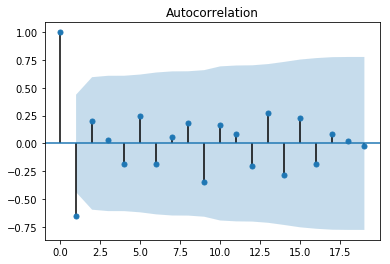

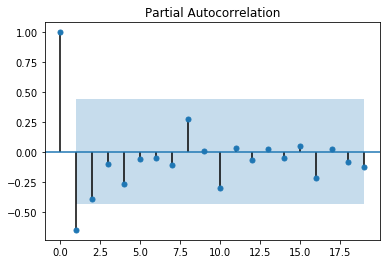

----------------------------------------------------


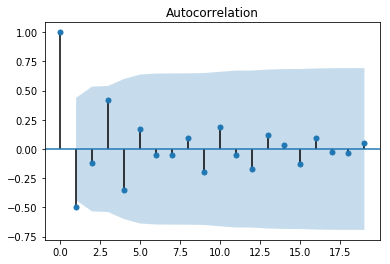

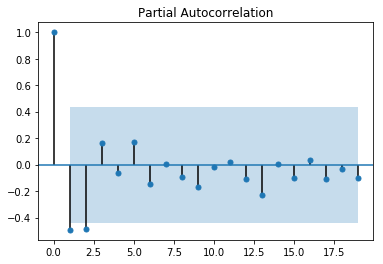

----------------------------------------------------


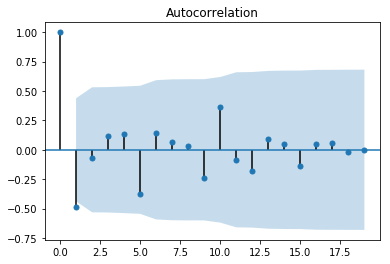

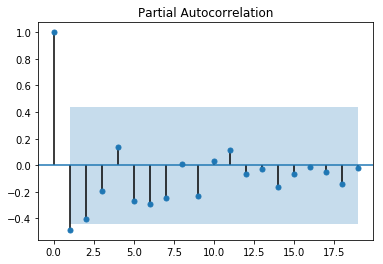

----------------------------------------------------


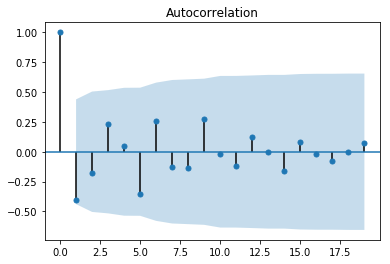

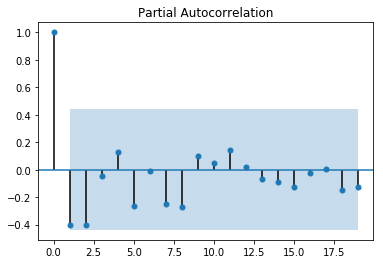

----------------------------------------------------


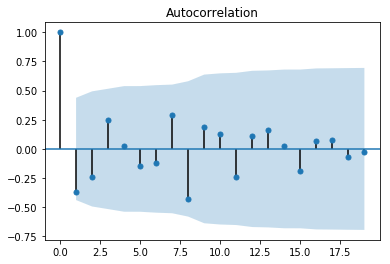

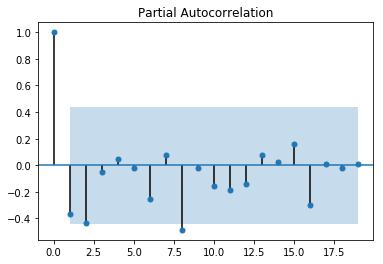

----------------------------------------------------


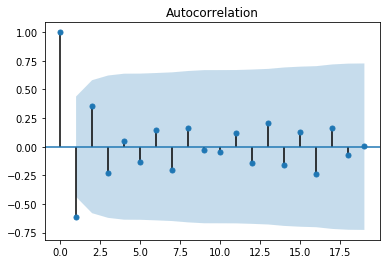

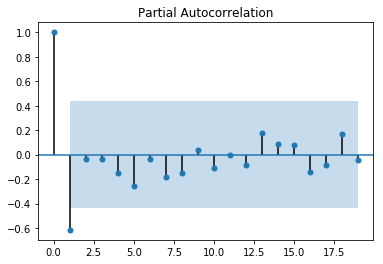

----------------------------------------------------


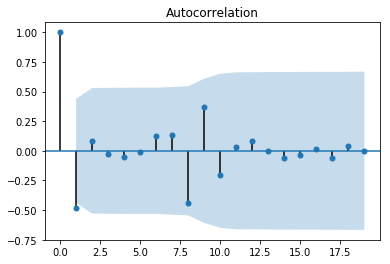

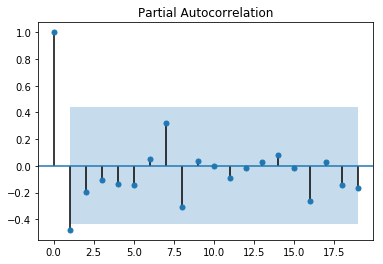

----------------------------------------------------


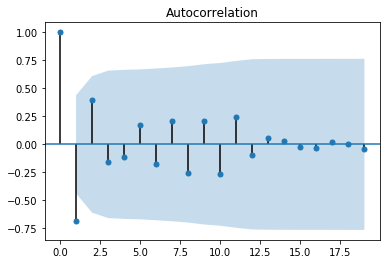

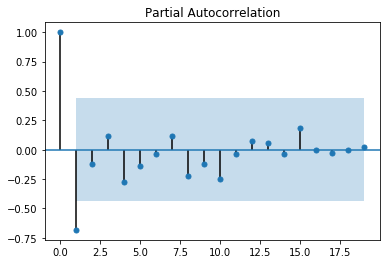

----------------------------------------------------


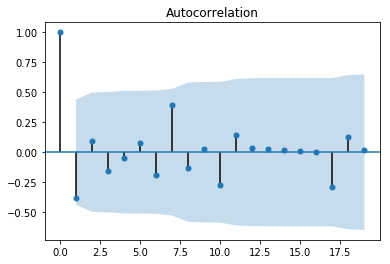

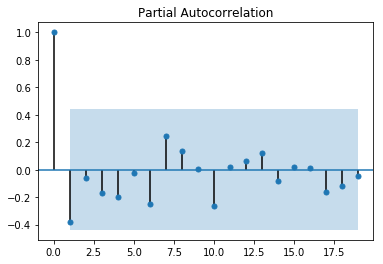

----------------------------------------------------


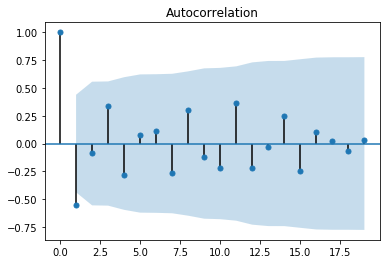

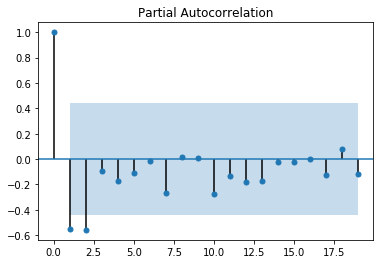

----------------------------------------------------


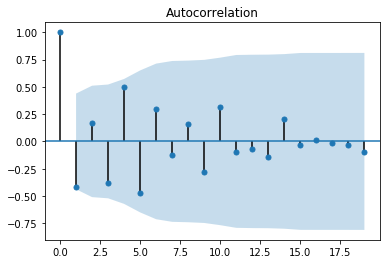

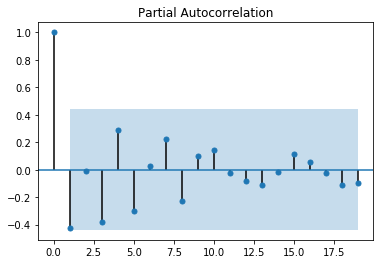

----------------------------------------------------


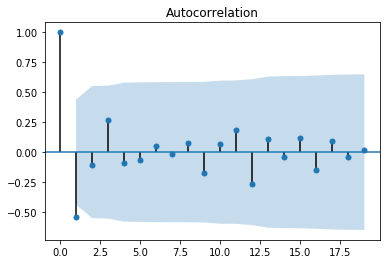

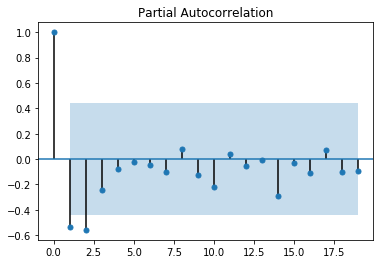

----------------------------------------------------


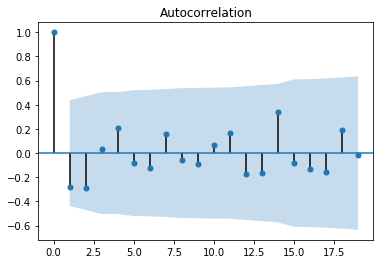

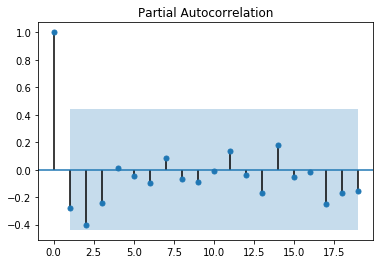

----------------------------------------------------


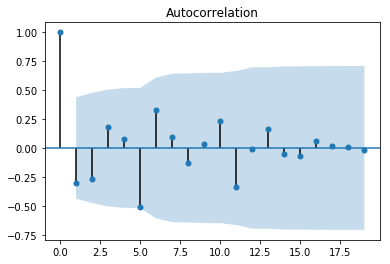

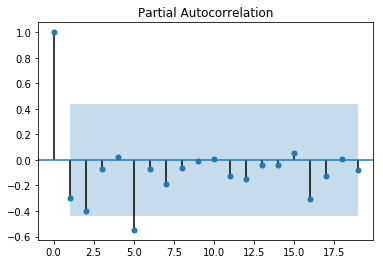

----------------------------------------------------


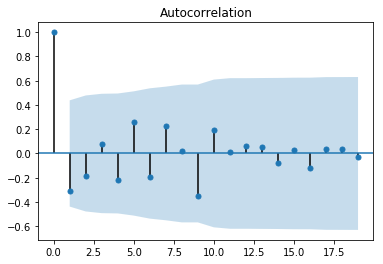

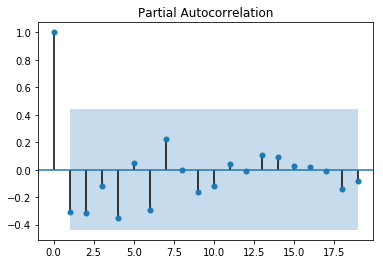

----------------------------------------------------


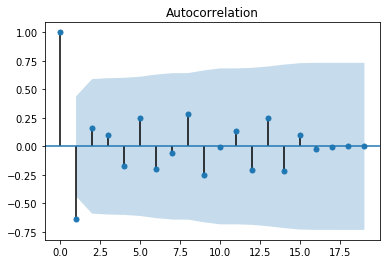

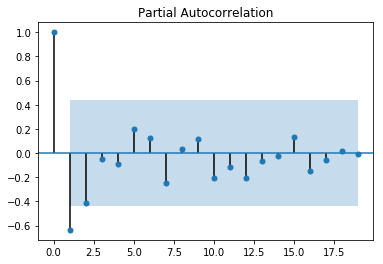

----------------------------------------------------


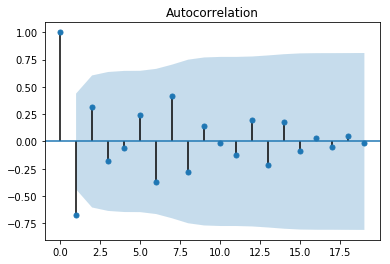

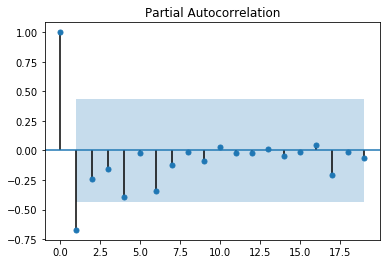

----------------------------------------------------


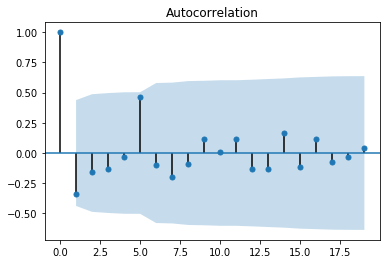

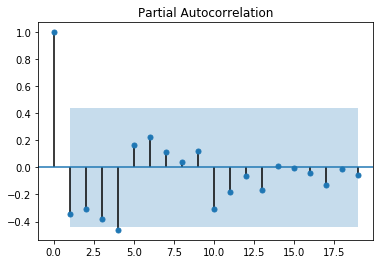

----------------------------------------------------


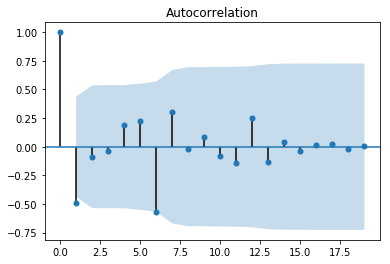

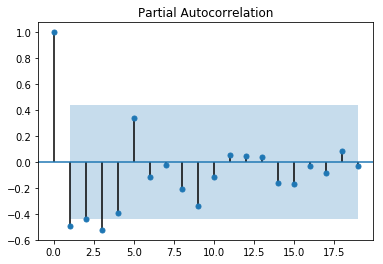

----------------------------------------------------


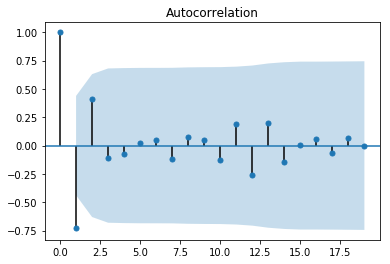

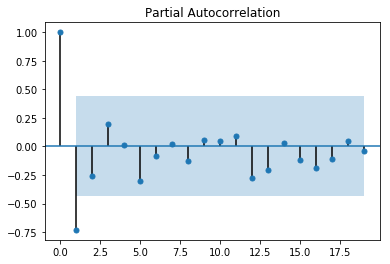

----------------------------------------------------


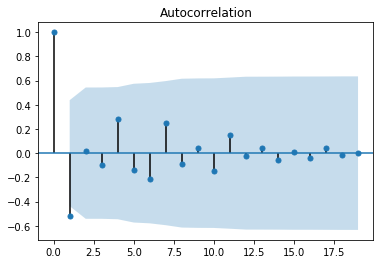

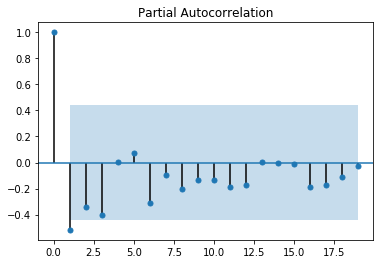

----------------------------------------------------


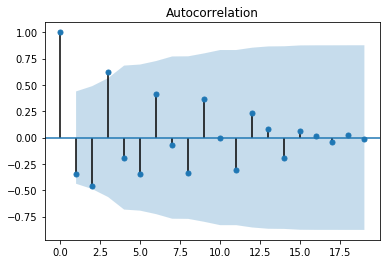

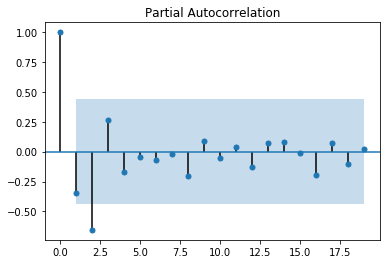

----------------------------------------------------


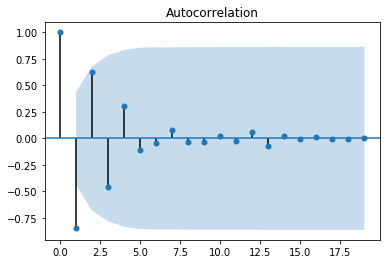

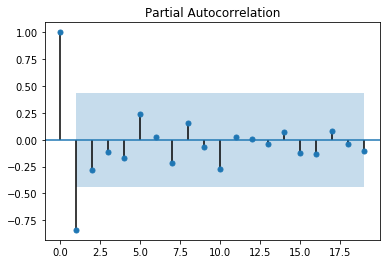

----------------------------------------------------


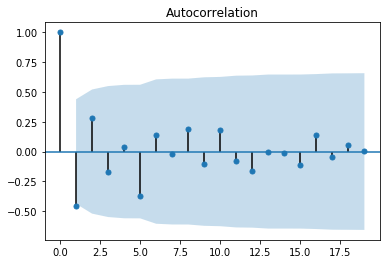

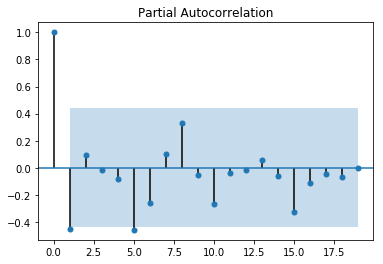

----------------------------------------------------


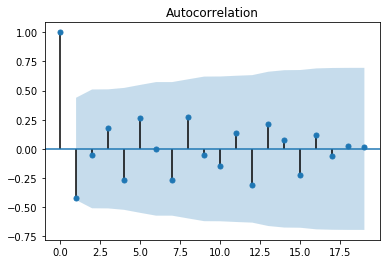

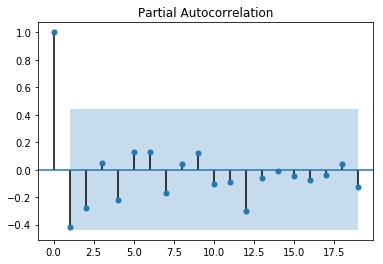

----------------------------------------------------


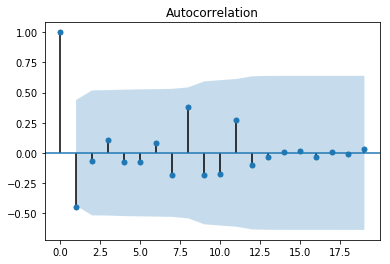

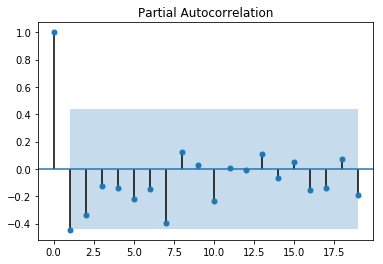

----------------------------------------------------


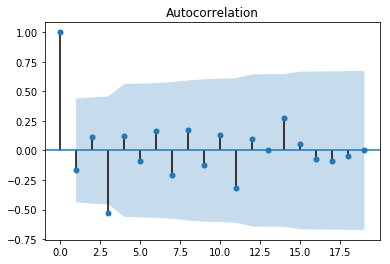

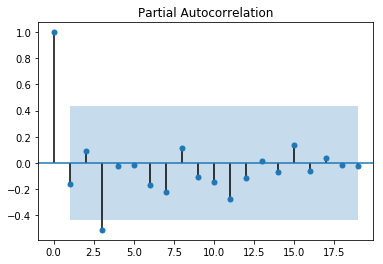

----------------------------------------------------


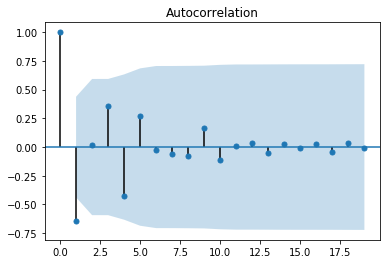

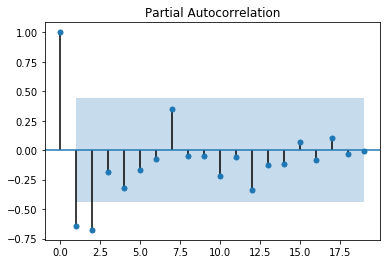

----------------------------------------------------


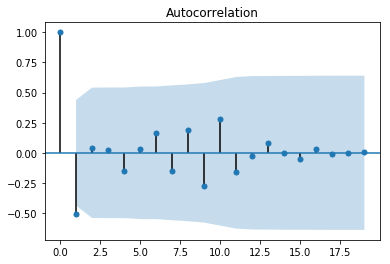

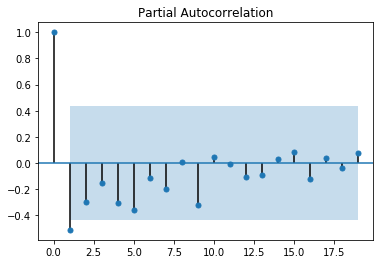

----------------------------------------------------


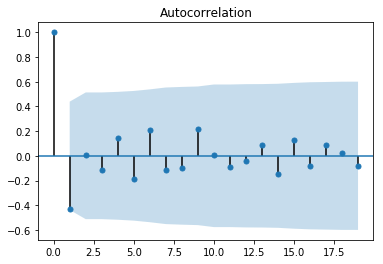

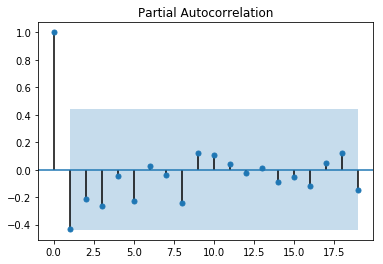

----------------------------------------------------


In [6]:
train = pd.read_csv('C:/Users/Froilan/Desktop/myFiles/JupyterFiles/stock_correlation_prediction/train_dev_test/before_arima/train.csv')
train = np.transpose(train.loc[:, ~train.columns.str.contains('^Unnamed')])
s = random.sample(range(0,55875),30)
for i in s:
    plot_acf(train[i].diff()[1:])
    plt.show()
    plt.close()
    plot_pacf(train[i].diff()[1:])
    plt.show()
    plt.close()
    print('----------------------------------------------------')

### 2 level Differencing

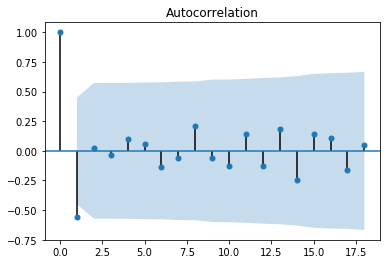

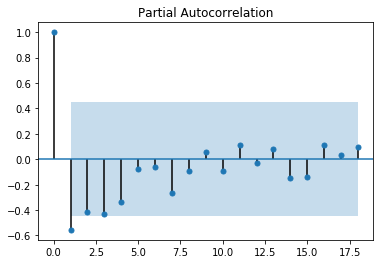

----------------------------------------------------


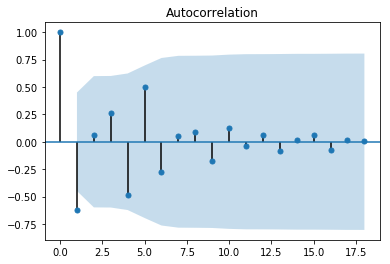

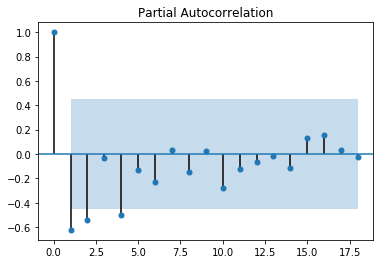

----------------------------------------------------


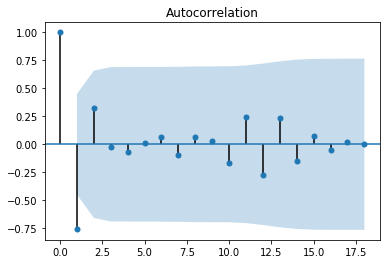

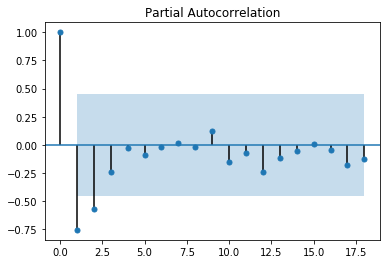

----------------------------------------------------


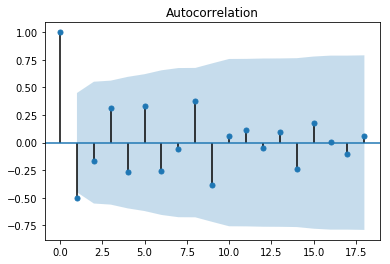

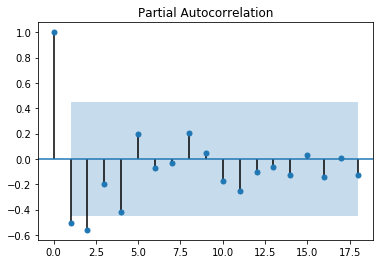

----------------------------------------------------


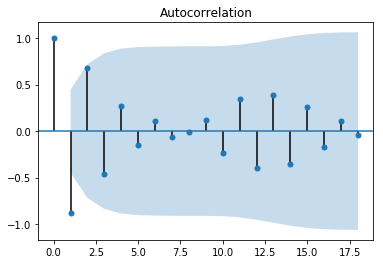

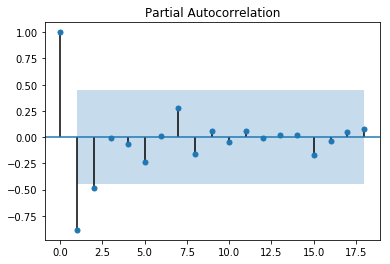

----------------------------------------------------


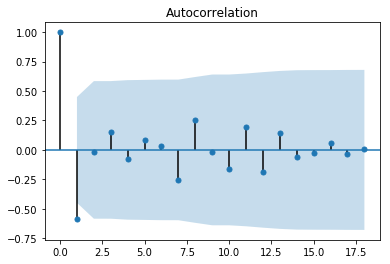

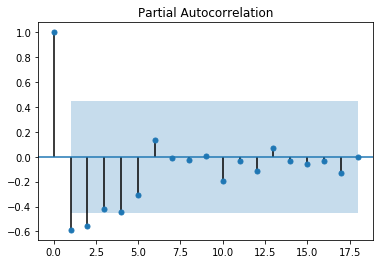

----------------------------------------------------


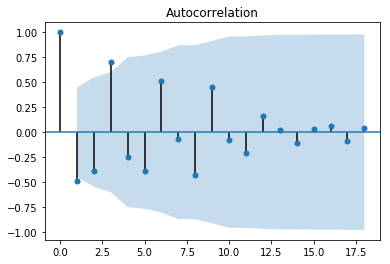

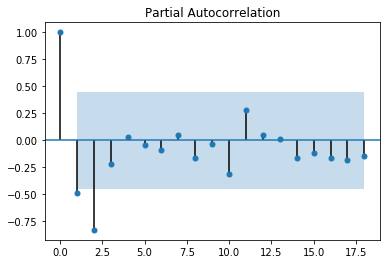

----------------------------------------------------


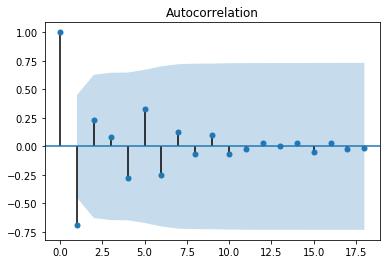

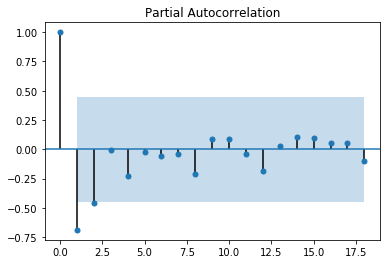

----------------------------------------------------


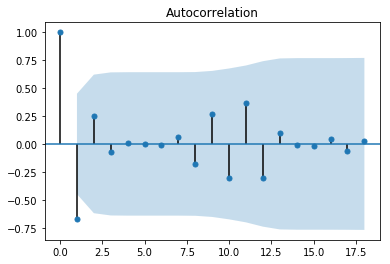

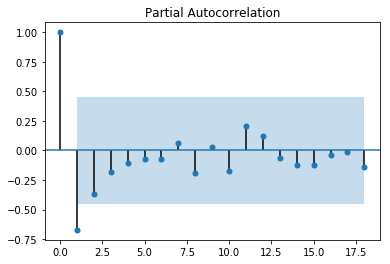

----------------------------------------------------


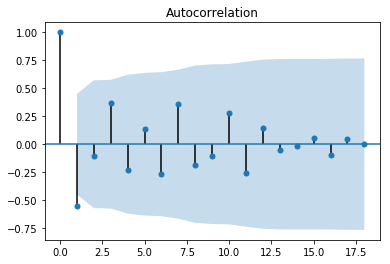

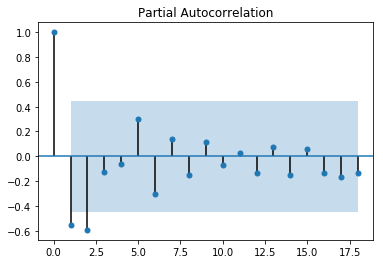

----------------------------------------------------


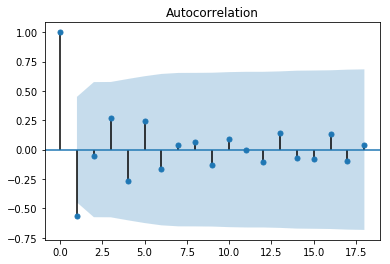

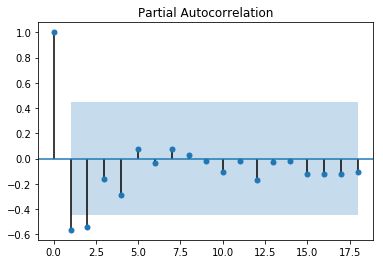

----------------------------------------------------


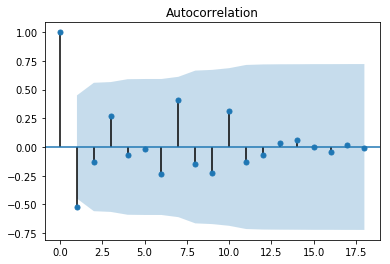

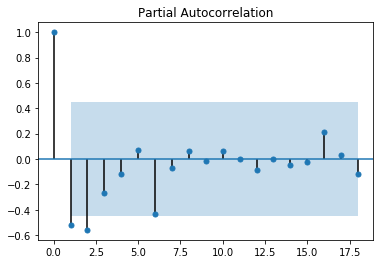

----------------------------------------------------


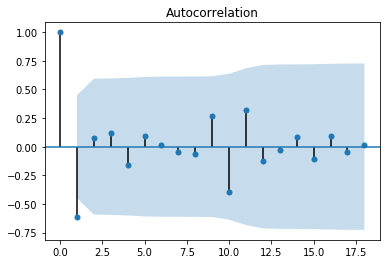

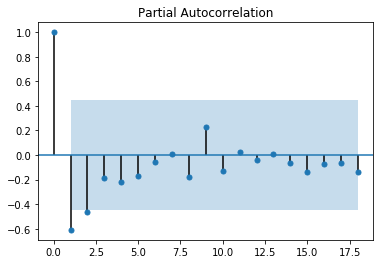

----------------------------------------------------


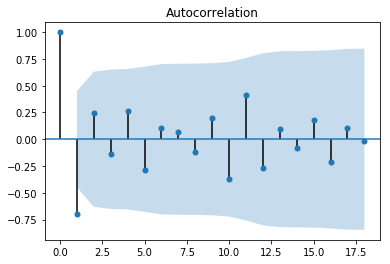

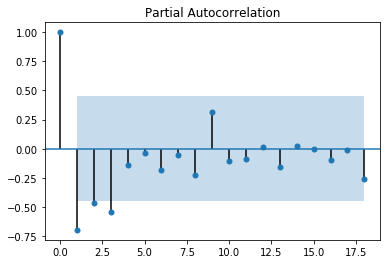

----------------------------------------------------


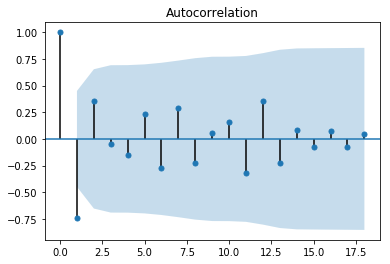

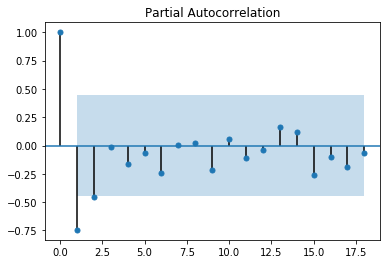

----------------------------------------------------


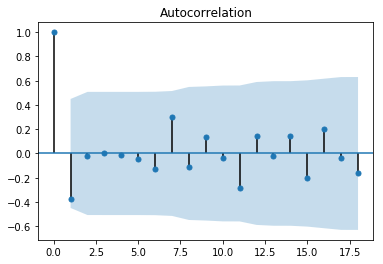

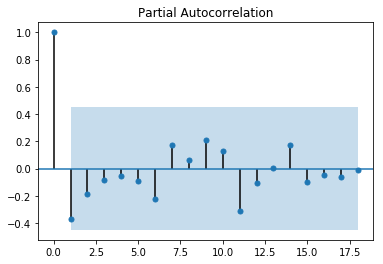

----------------------------------------------------


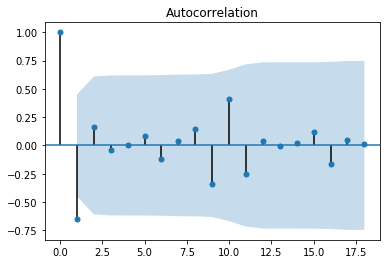

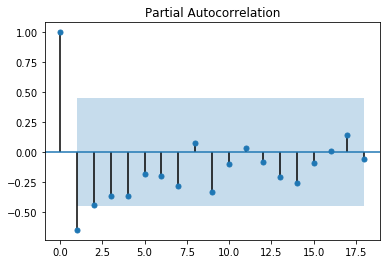

----------------------------------------------------


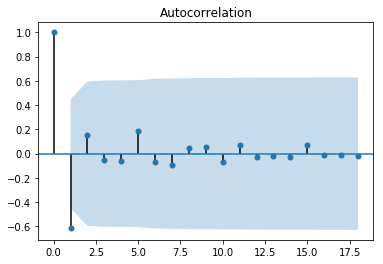

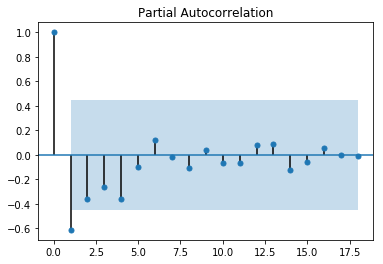

----------------------------------------------------


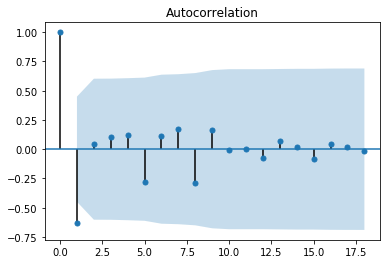

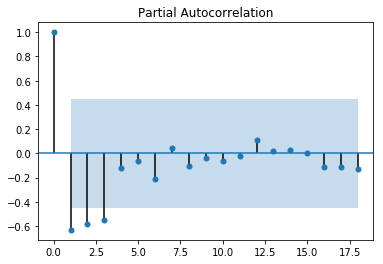

----------------------------------------------------


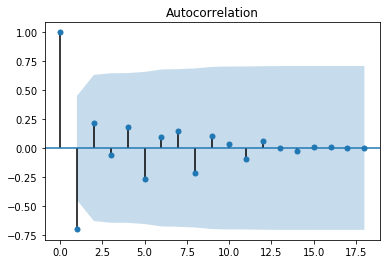

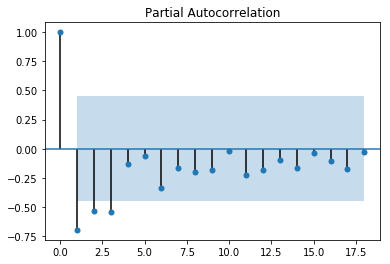

----------------------------------------------------


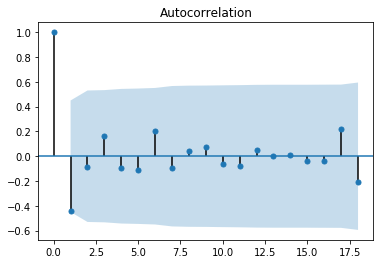

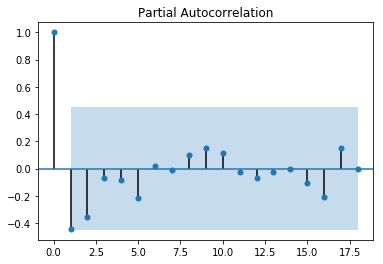

----------------------------------------------------


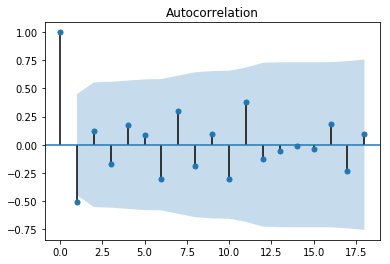

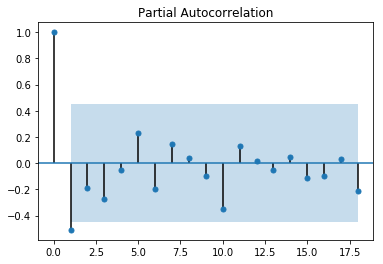

----------------------------------------------------


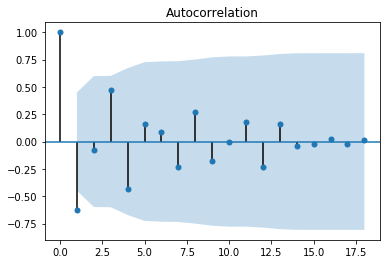

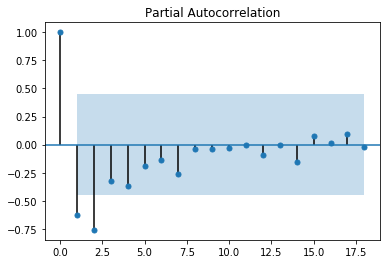

----------------------------------------------------


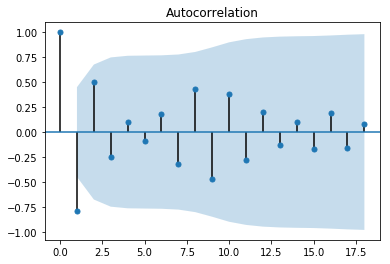

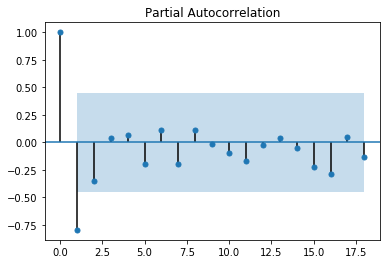

----------------------------------------------------


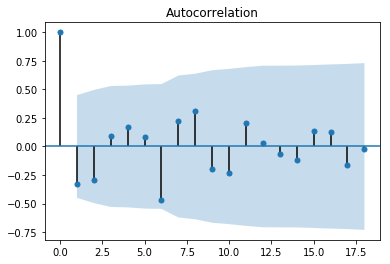

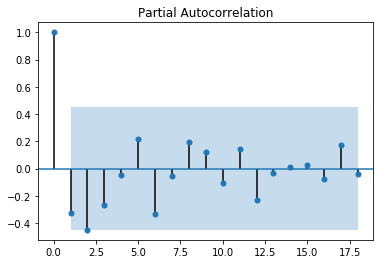

----------------------------------------------------


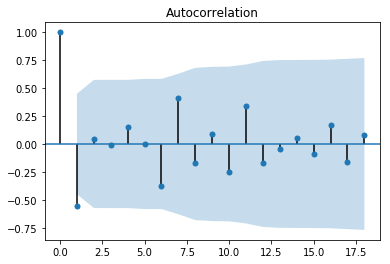

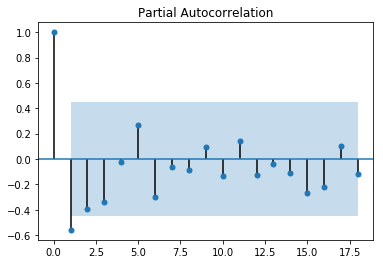

----------------------------------------------------


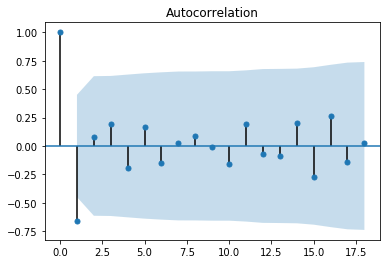

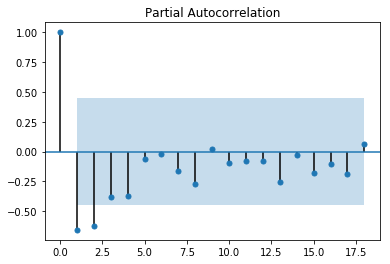

----------------------------------------------------


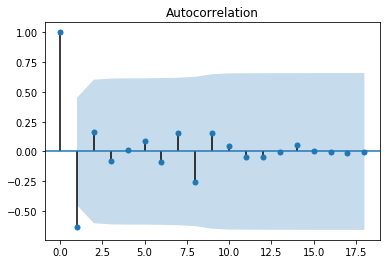

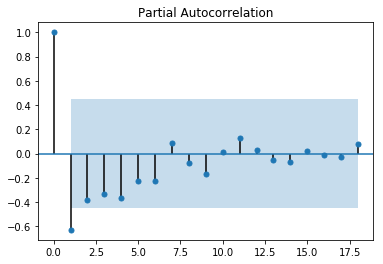

----------------------------------------------------


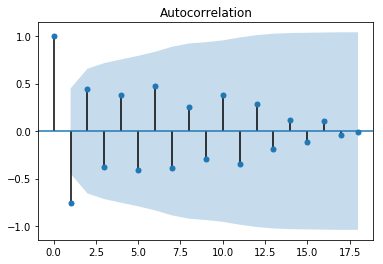

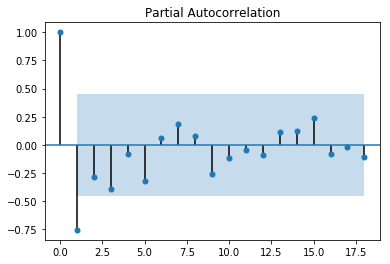

----------------------------------------------------


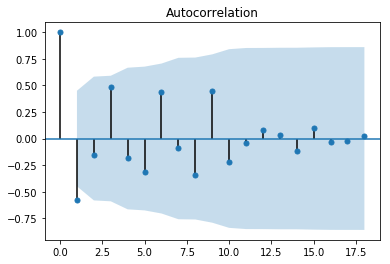

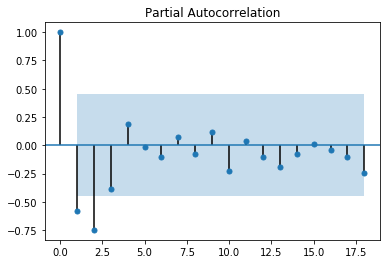

----------------------------------------------------


In [7]:
s = random.sample(range(0,55875),30)
for i in s:
    plot_acf(train[i].diff().diff()[2:])
    plt.show()
    plt.close()
    plot_pacf(train[i].diff().diff()[2:])
    plt.show()
    plt.close()
    print('----------------------------------------------------')

ARIMA(2,1,0), ARIMA(3,1,0), ARIMA(1,1,1), ARIMA(2,1,1), ARIMA(3,1,1) or ARIMA(1,2,1), ARIMA(2,2,1) seems to be generally adequate

### Plot the Data

27621


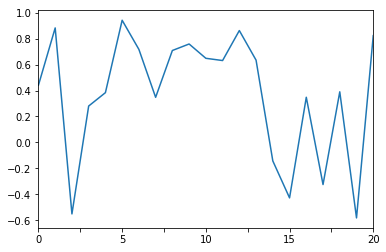

42370


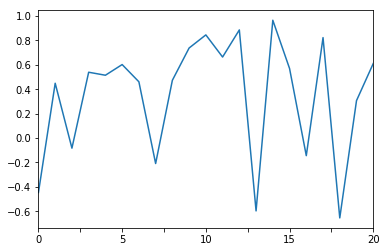

15300


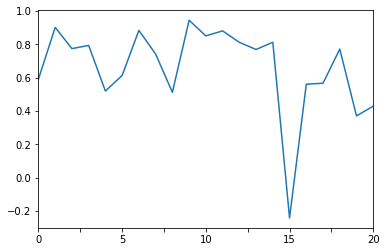

55728


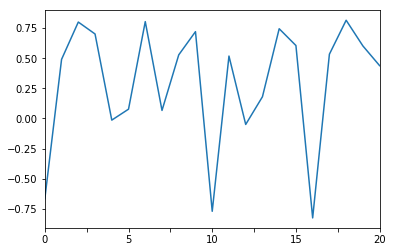

50926


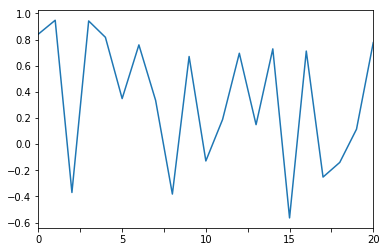

38447


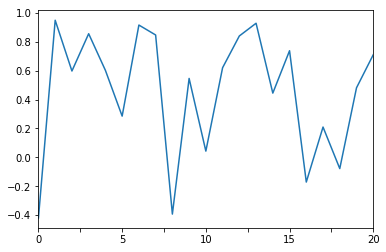

52660


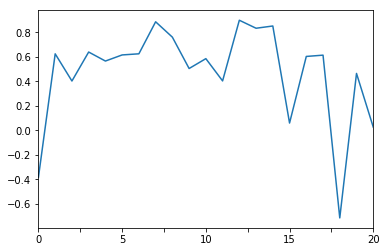

692


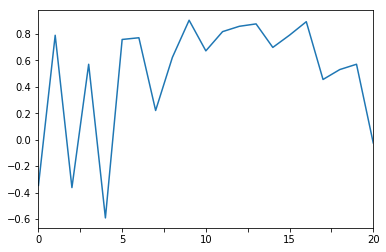

45776


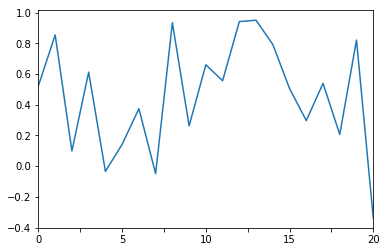

16259


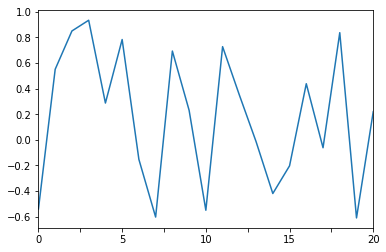

28718


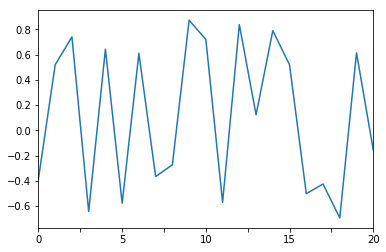

52645


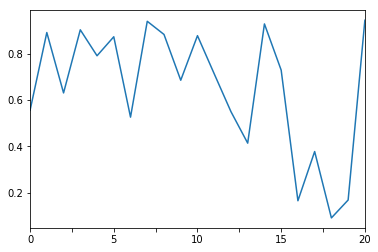

10340


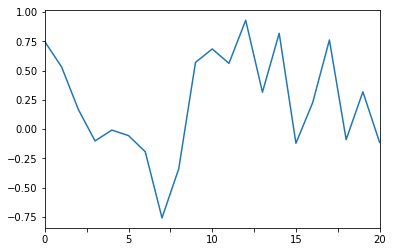

47300


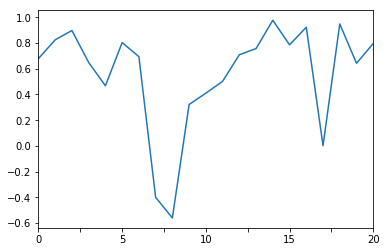

32603


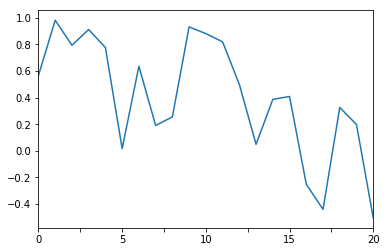

40562


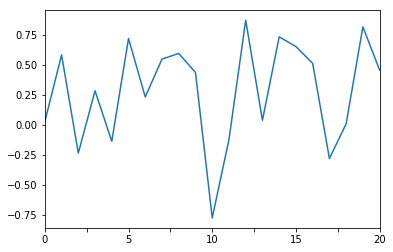

33718


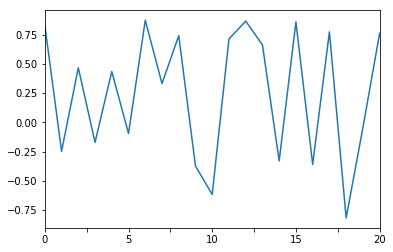

39873


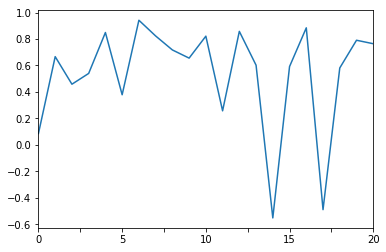

18748


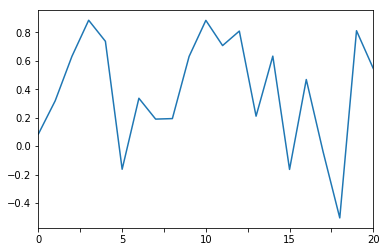

18586


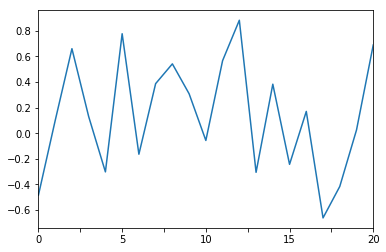

43604


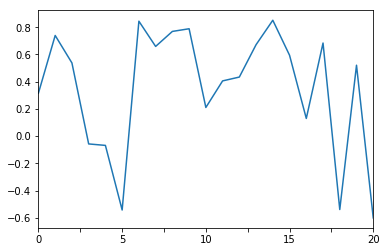

53203


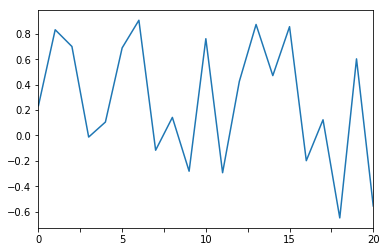

19764


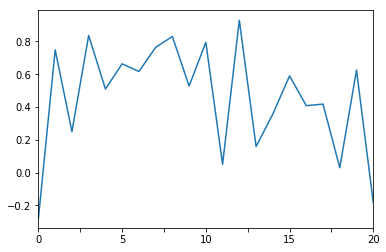

7296


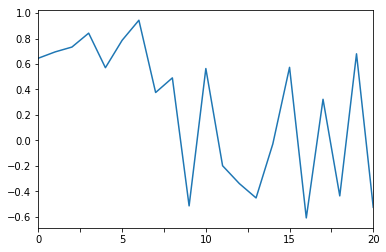

38168


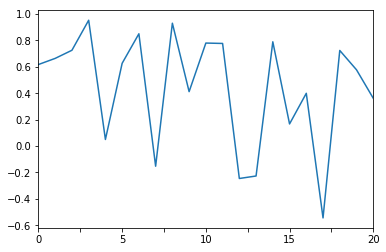

22646


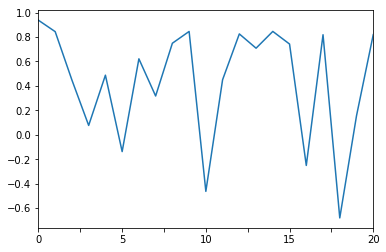

19645


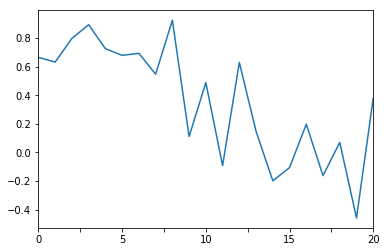

53644


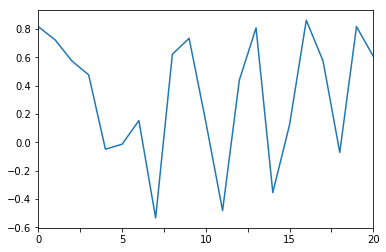

40780


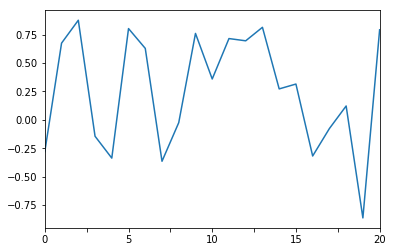

835


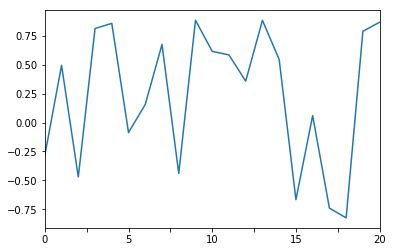

23636


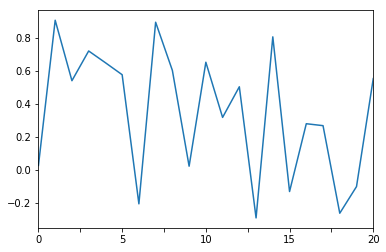

52003


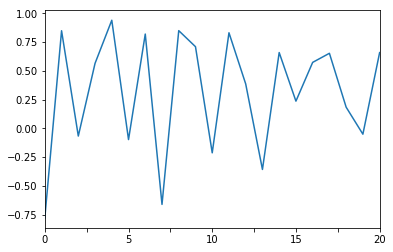

50993


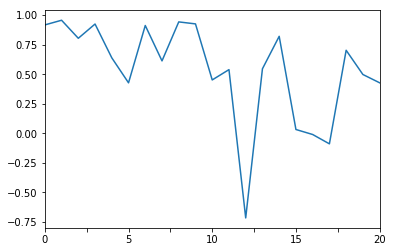

14432


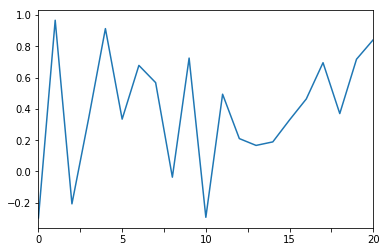

41110


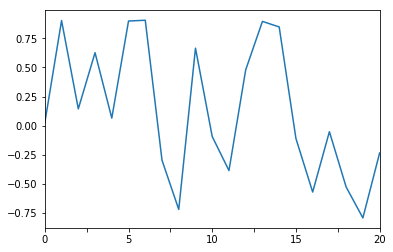

9531


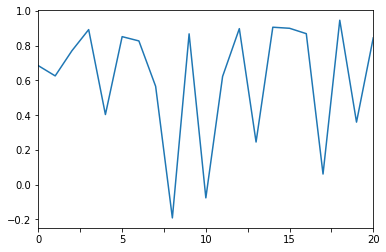

11740


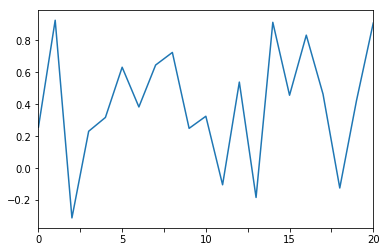

26568


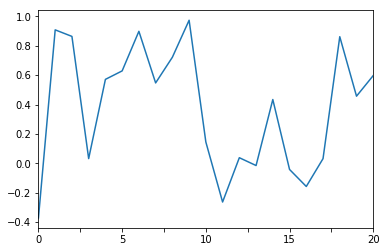

50636


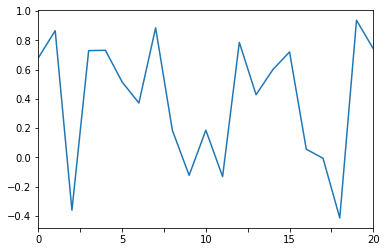

11329


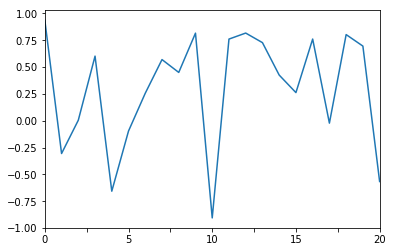

5749


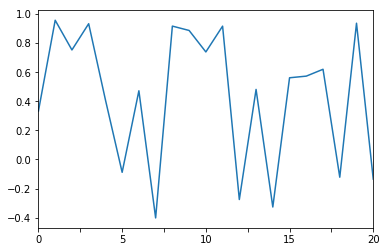

30047


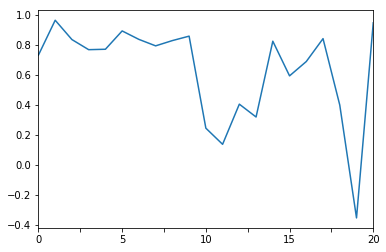

13885


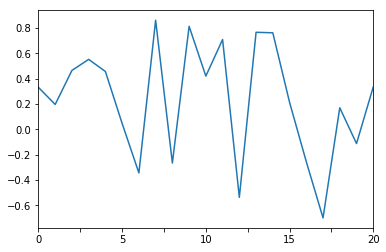

41224


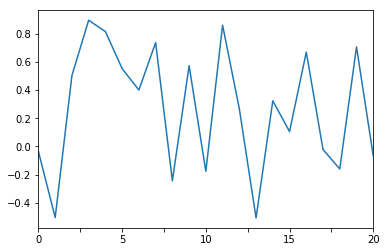

18327


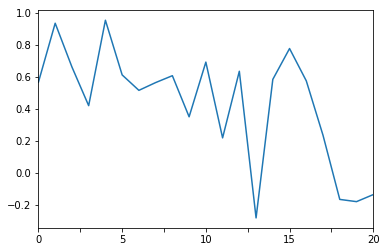

18277


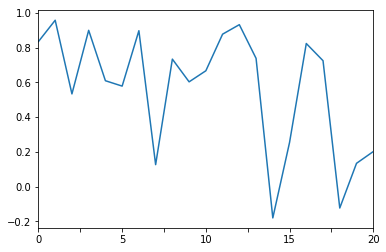

20277


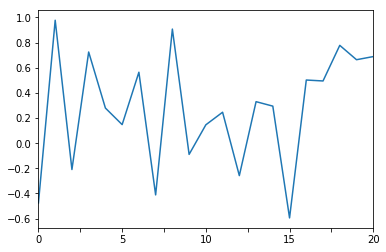

9350


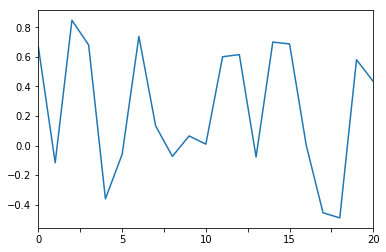

2517


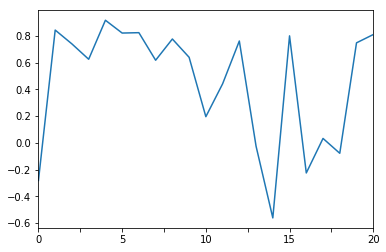

26630


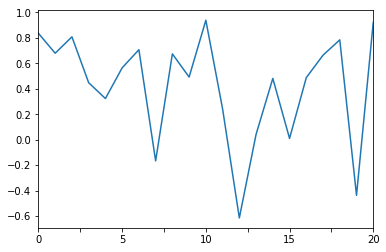

17080


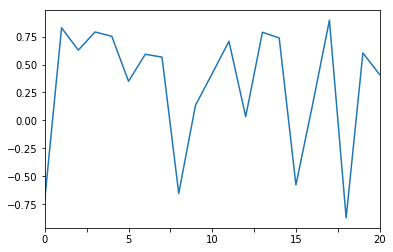

37890


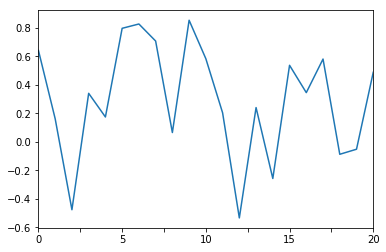

7436


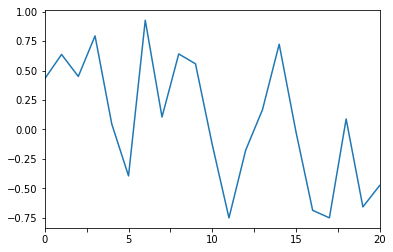

30555


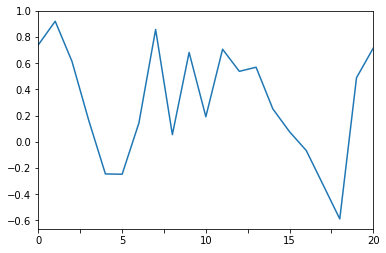

32447


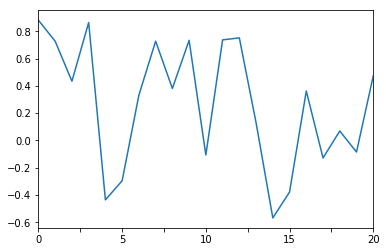

4735


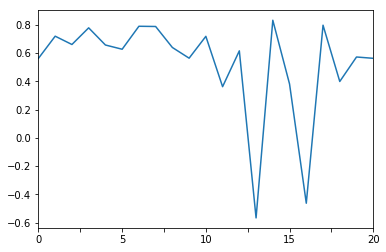

20766


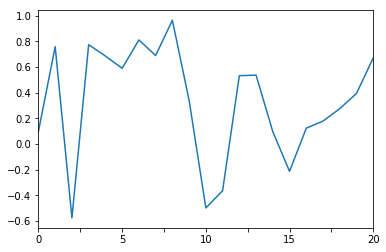

45996


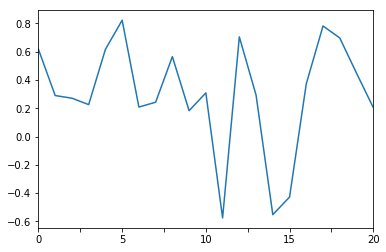

44062


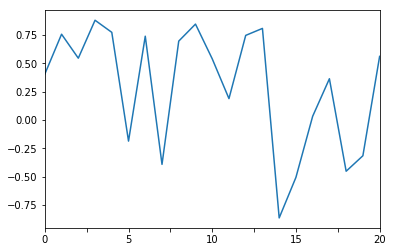

10679


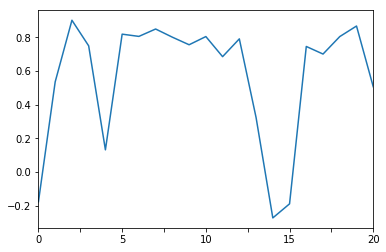

40560


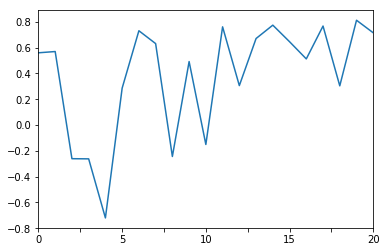

41942


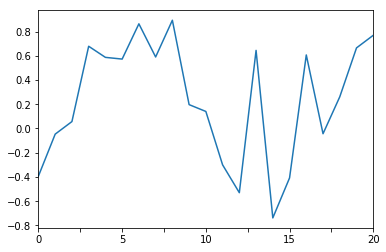

49725


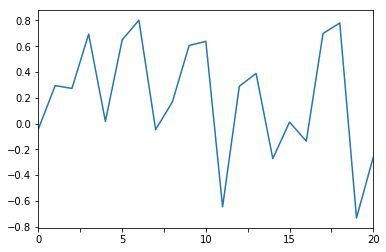

34050


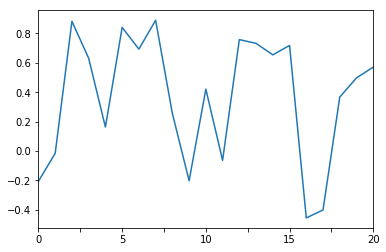

54713


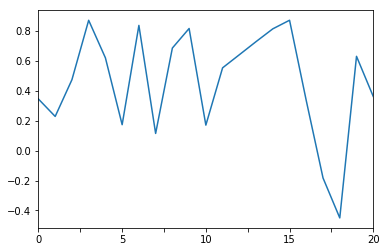

13050


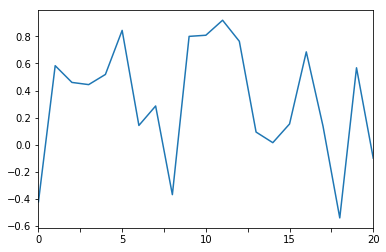

12902


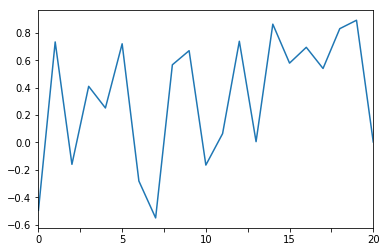

29269


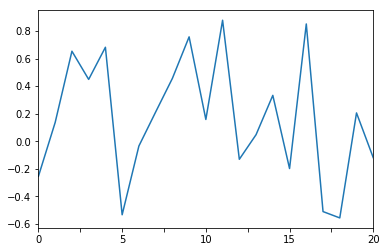

3307


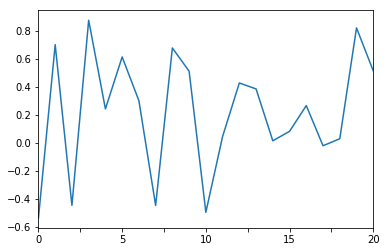

18202


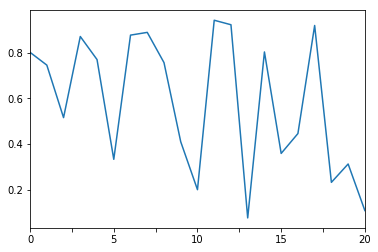

53436


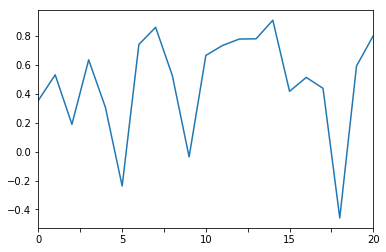

34124


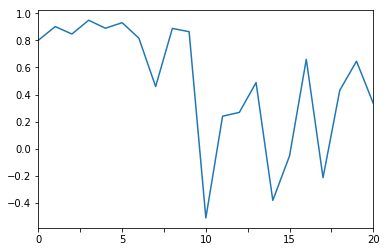

19721


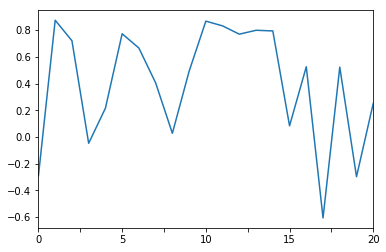

39453


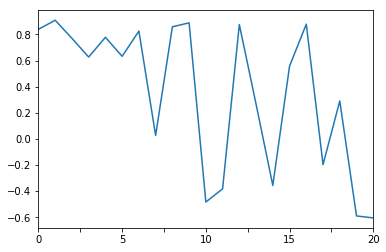

1402


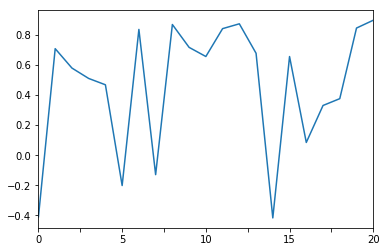

53361


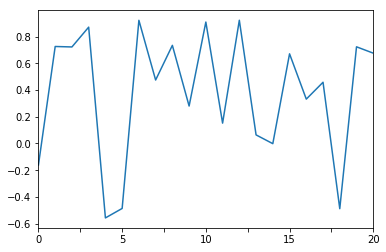

1296


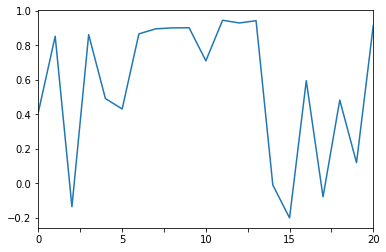

18479


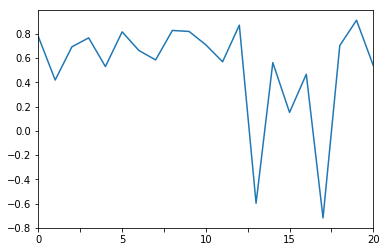

33082


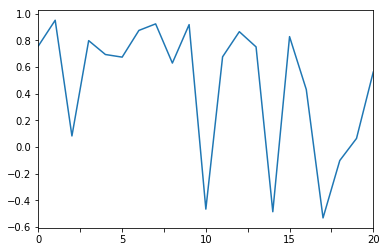

3347


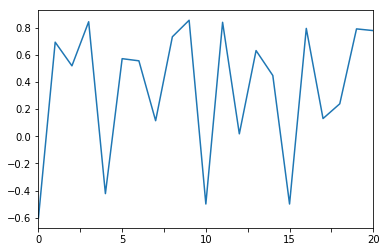

28300


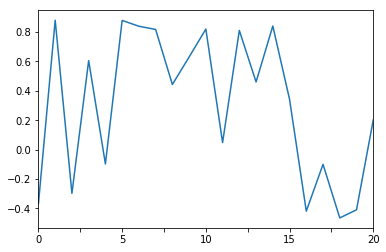

43467


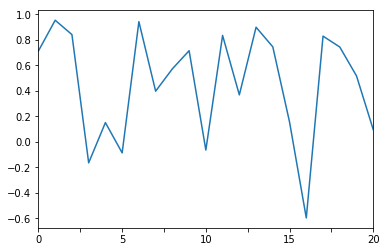

27910


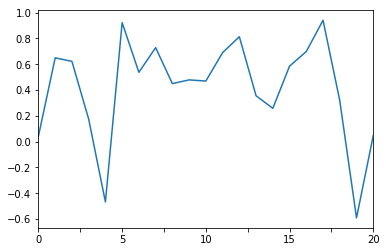

47485


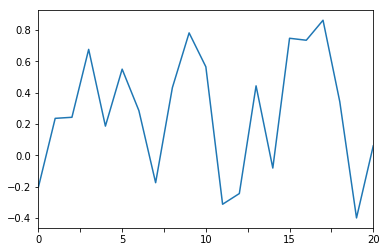

46354


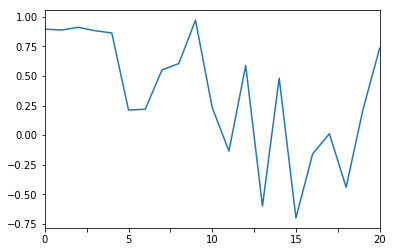

31806


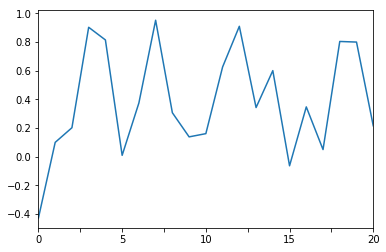

29898


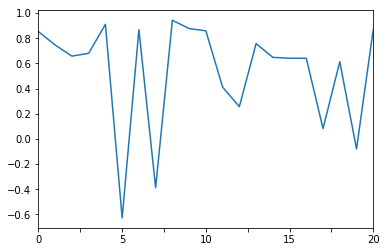

45783


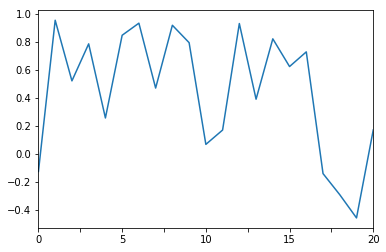

24743


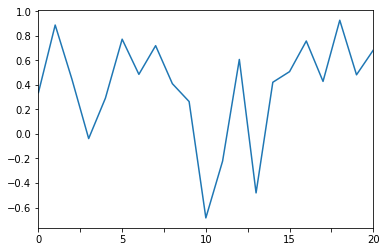

34530


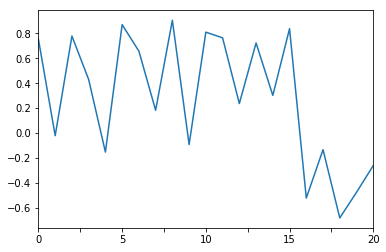

39555


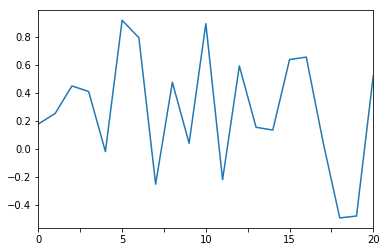

21910


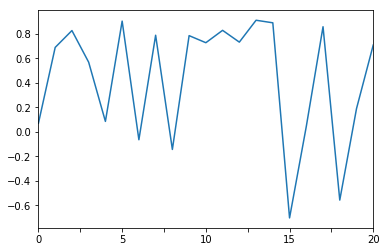

52376


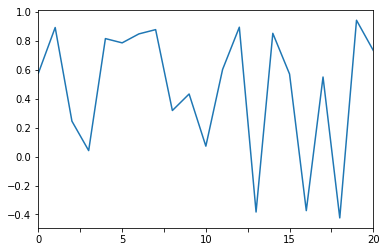

14168


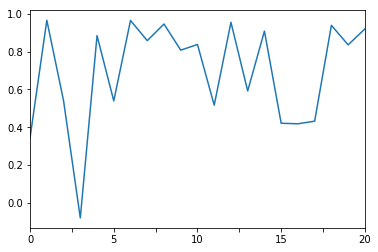

39646


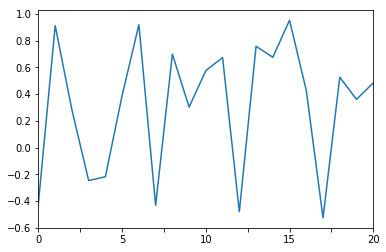

15554


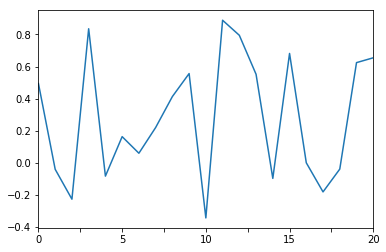

17116


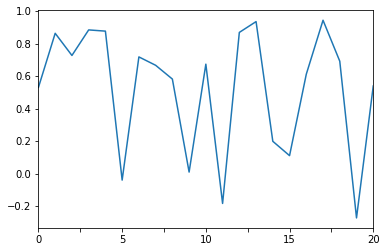

29756


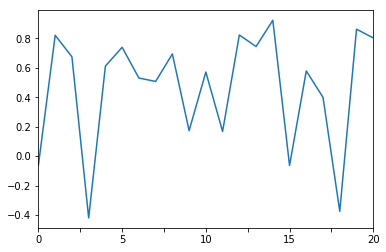

12832


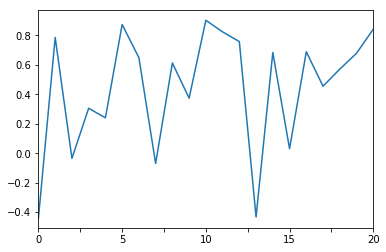

42204


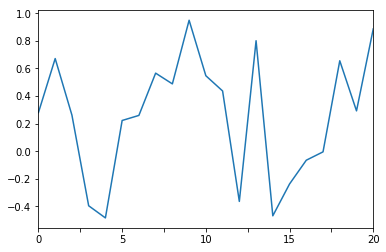

In [14]:
train = pd.read_csv('C:/Users/Froilan/Desktop/myFiles/JupyterFiles/stock_correlation_prediction/train_dev_test/before_arima/train.csv')
train = np.transpose(train.loc[:,~train.columns.str.contains('^Unnamed')])

for _ in range(100):
    randint = random.randrange(0,55875,1)
    print(randint)
    train[randint].plot()
    plt.show()
    plt.close()

In [34]:
stat = pd.DataFrame()
for i in range(55875):
    df = train[i].describe()
    stat[i] = df
stat

,0,1,2,3,4,5,6,7,8,9,...,55865,55866,55867,55868,55869,55870,55871,55872,55873,55874
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,...,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,0.467162,0.456730,0.486936,0.508950,0.453143,0.334481,0.346837,0.362295,0.412165,0.370844,...,0.506204,0.491705,0.533213,0.557960,0.611537,0.488108,0.450728,0.506021,0.564559,0.593362
std,0.324179,0.394954,0.395142,0.430719,0.426572,0.416970,0.473661,0.536652,0.524528,0.489112,...,0.360121,0.443312,0.463251,0.409558,0.297357,0.376876,0.471394,0.414989,0.340138,0.252155
min,-0.263715,-0.427287,-0.516127,-0.536545,-0.667206,-0.799536,-0.765995,-0.693420,-0.843329,-0.826591,...,-0.455182,-0.584284,-0.774457,-0.730393,-0.201353,-0.337017,-0.560923,-0.418527,-0.149538,0.141614
25%,0.188668,0.239057,0.265099,0.320646,0.318157,0.112211,0.060491,-0.065908,0.174396,0.057402,...,0.168944,0.448579,0.407924,0.435792,0.526365,0.368931,0.187975,0.243556,0.386957,0.413954
50%,0.555098,0.594037,0.698361,0.676093,0.558642,0.429319,0.358112,0.506752,0.590425,0.505322,...,0.557687,0.650549,0.752839,0.709960,0.754556,0.579876,0.607262,0.632534,0.690577,0.618142
75%,0.673331,0.758942,0.805386,0.834689,0.721777,0.591869,0.753708,0.861153,0.842937,0.678119,...,0.845159,0.793177,0.850063,0.803205,0.806614,0.755595,0.804776,0.843400,0.847068,0.810770
max,0.917480,0.893918,0.902180,0.910266,0.917614,0.954869,0.973667,0.973434,0.954591,0.927918,...,0.870828,0.930292,0.896214,0.911252,0.893380,0.917817,0.937390,0.945463,0.951715,0.943243


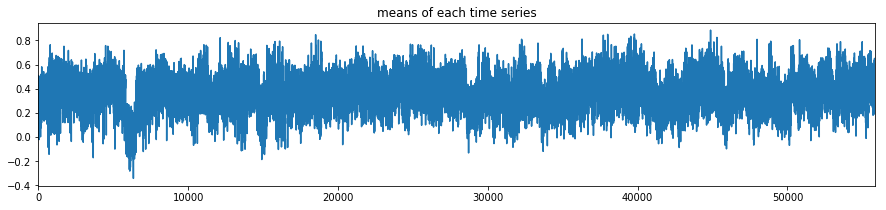

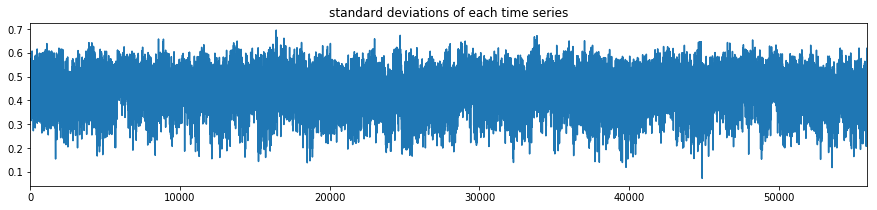

In [60]:
mean = stat.iloc[1,:].copy()
stdev = stat.iloc[2,:].copy()
mean.plot(figsize=(15,3))
plt.title('means of each time series')
plt.show()
plt.close()
stdev.plot(figsize=(15,3))
plt.title('standard deviations of each time series')
plt.show()
plt.close()

# ARIMA Modeling

In [8]:
train = pd.read_csv('C:/Users/Froilan/Desktop/myFiles/JupyterFiles/stock_correlation_prediction/train_dev_test/before_arima/train.csv')
dev = pd.read_csv('C:/Users/Froilan/Desktop/myFiles/JupyterFiles/stock_correlation_prediction/train_dev_test/before_arima/dev.csv')
test1 = pd.read_csv('C:/Users/Froilan/Desktop/myFiles/JupyterFiles/stock_correlation_prediction/train_dev_test/before_arima/test1.csv')
test2 = pd.read_csv('C:/Users/Froilan/Desktop/myFiles/JupyterFiles/stock_correlation_prediction/train_dev_test/before_arima/test2.csv')

train = np.transpose(train.loc[:,~train.columns.str.contains('^Unnamed')])
dev = np.transpose(dev.loc[:,~dev.columns.str.contains('^Unnamed')])
test1 = np.transpose(test1.loc[:,~test1.columns.str.contains('^Unnamed')])
test2 = np.transpose(test2.loc[:,~test2.columns.str.contains('^Unnamed')])

datasets = [train, dev, test1, test2]

In [1]:
model_210 = ARIMA(order=(2,1,0), method='mle', suppress_warnings=True)
model_310 = ARIMA(order=(3,1,0), method='mle', suppress_warnings=True)
model_111 = ARIMA(order=(1,1,1), method='mle', suppress_warnings=True)
model_211 = ARIMA(order=(2,1,1), method='mle', suppress_warnings=True)
model_311 = ARIMA(order=(3,1,1), method='mle', suppress_warnings=True)

train_X = []; train_Y = []
dev_X = []; dev_Y = []
test1_X = []; test1_Y = []
test2_X = []; test2_Y = []

flag = 0

for i in range(55875):
    tmp = []
    c=0
    for s in datasets :
        c+=1
        try:
            model1 = model_210.fit(s[i])
            model = model1
            
            try:
                model2 = model_310.fit(s[i])
                
                if model.aic() <= model2.aic() :
                    pass
                else :
                    model = model2
                    
                try :
                    model3 = model_111.fit(s[i])
                    if model.aic() <= model3.aic() :
                        pass
                    else :
                        model = model3
                except :
                    try:
                        model4 = model_211.fit(s[i])
                        
                        if model.aic() <= model4.aic() :
                            pass
                        else:
                            model = model4
                    except:
                        try:
                            model5 = model_311.fit(s[i])
                            
                            if model.aic() <= model5.aic():
                                pass
                            else :
                                model = model5
                        except :
                            pass
                    
            except:
                try:
                    model3 = model_111.fit(s[i])

                    if model.aic() <= model3.aic() :
                        pass
                    else :
                        model = model3
                except :
                    try:
                        model4 = model_211.fit(s[i])
                        
                        if model.aic() <= model4.aic() :
                            pass
                        else:
                            model = model4
                    except:
                        try:
                            model5 = model_311.fit(s[i])
                            
                            if model.aic() <= model5.aic():
                                pass
                            else :
                                model = model5
                        except :
                            pass
                
        except:
            try:
                model2 = model_310.fit(s[i])
                model = model2
            
                try :
                    model3 = model_111.fit(s[i])
                    
                    if model.aic() <= model3.aic():
                        pass
                    else:
                        model = model3
                except :
                    try:
                        model4 = model_211.fit(s[i])
                        
                        if model.aic() <= model4.aic() :
                            pass
                        else:
                            model = model4
                    except:
                        try:
                            model5 = model_311.fit(s[i])
                            
                            if model.aic() <= model5.aic():
                                pass
                            else :
                                model = model5
                        except :
                            pass
            
            except :
                try:
                    model3 = model_111.fit(s[i])
                    model = model3
                except :
                    try:
                        model4 = model_121.fit(s[i])
                        
                        if model.aic() <= model4.aic() :
                            pass
                        else:
                            model = model4
                    except:
                        try:
                            model5 = model_311.fit(s[i])
                            
                            if model.aic() <= model5.aic():
                                pass
                            else :
                                model = model5
                        except :
                            flag = 1
                            print(str(c) + " FATAL ERROR")
                            break
        
        predictions = model.predict(n_periods=21)
        residual = pd.Series(np.array(s[i]) - np.array(predictions))
        tmp.append(np.array(residual))
                    
    if flag == 1:
        break
    train_X.append(tmp[0][:20])
    train_Y.append(tmp[0][20])
    dev_X.append(tmp[1][:20])
    dev_Y.append(tmp[1][20])
    test1_X.append(tmp[2][:20])
    test1_Y.append(tmp[2][20])
    test2_X.append(tmp[3][:20])
    test2_Y.append(tmp[3][20])

In [11]:
pd.DataFrame(train_X).to_csv('C:/Users/Froilan/Desktop/myFiles/JupyterFiles/stock_correlation_prediction/train_dev_test/after_arima/train_X.csv')
pd.DataFrame(dev_X).to_csv('C:/Users/Froilan/Desktop/myFiles/JupyterFiles/stock_correlation_prediction/train_dev_test/after_arima/dev_X.csv')
pd.DataFrame(test1_X).to_csv('C:/Users/Froilan/Desktop/myFiles/JupyterFiles/stock_correlation_prediction/train_dev_test/after_arima/test1_X.csv')
pd.DataFrame(test2_X).to_csv('C:/Users/Froilan/Desktop/myFiles/JupyterFiles/stock_correlation_prediction/train_dev_test/after_arima/test2_X.csv')
pd.DataFrame(train_Y).to_csv('C:/Users/Froilan/Desktop/myFiles/JupyterFiles/stock_correlation_prediction/train_dev_test/after_arima/train_Y.csv')
pd.DataFrame(dev_Y).to_csv('C:/Users/Froilan/Desktop/myFiles/JupyterFiles/stock_correlation_prediction/train_dev_test/after_arima/dev_Y.csv')
pd.DataFrame(test1_Y).to_csv('C:/Users/Froilan/Desktop/myFiles/JupyterFiles/stock_correlation_prediction/train_dev_test/after_arima/test1_Y.csv')
pd.DataFrame(test2_Y).to_csv('C:/Users/Froilan/Desktop/myFiles/JupyterFiles/stock_correlation_prediction/train_dev_test/after_arima/test2_Y.csv')
